# Task 1: EDA

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For regression models and evaluation later
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("hour.csv")  # Make sure hour.csv is in the same directory or provide full path

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379

We removed the following columns from the dataset:

- Instant: it is just a unique id for each row, doesnt add any predictive value

- dteday: A string version of the date. Since we already have features like year (yr), month (mnth), and day of the week (weekday), this becomes redundant.

- casual and registered: These two columns together directly sum up to the target variable (cnt), which represents the total bike rentals. Keeping them would be a form of data leakage because the model would learn the target from its components instead of actual predictors.


In [6]:
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

### EDA Visualizations

<Figure size 1200x600 with 0 Axes>

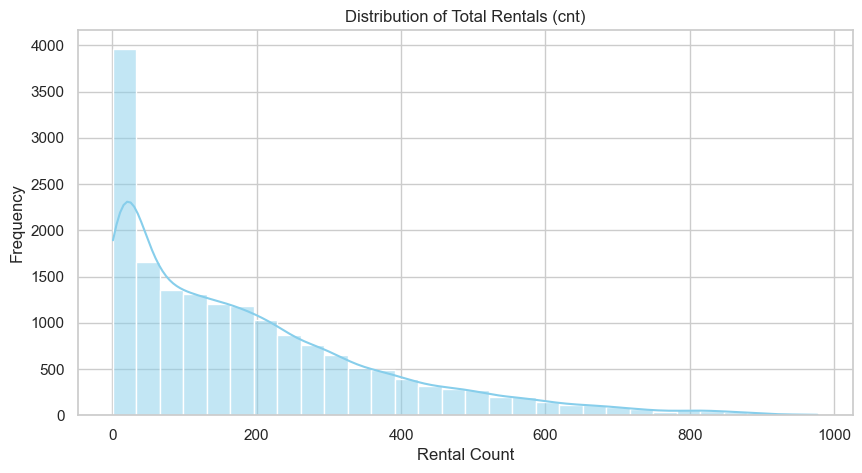

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Distribution of Total Rentals (cnt)
plt.figure(figsize=(10, 5))
sns.histplot(df['cnt'], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Total Rentals (cnt)")
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()

Helps us understand how bike rentals are distributed. The histogram shows that most bike rental sessions fall on the lower end of the scale, with a noticeable right skew. This makes sense because high rental spikes are rarer, while lower or moderate rental volumes are more common. The peak is strong in the 0-100 rental range and then it gradually decreases. High rental counts are much more rare, which is somethign that we were expecting.


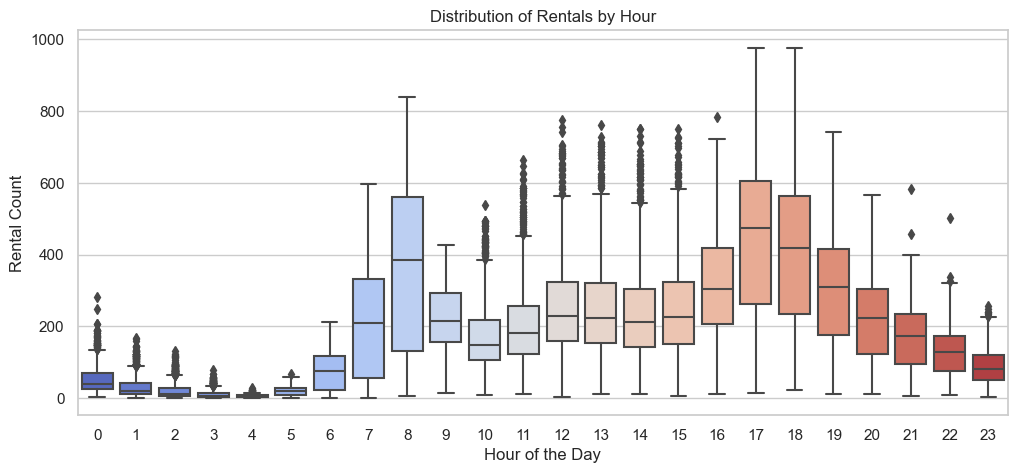

In [3]:
# 2. Rentals by Hour of the Day
plt.figure(figsize=(12, 5))
sns.boxplot(x='hr', y='cnt', data=df, palette="coolwarm")
plt.title("Distribution of Rentals by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Rental Count")
plt.show()

Shows usage trends by hour. We can see that there are 2 noticeable peaks which are morning hours around 8AM and afternoon around 5-6PM. This makes sense as they are likely the typical commuting hours. We can also see that early in the morning there are far few less people who rent bikes (2-5AM)

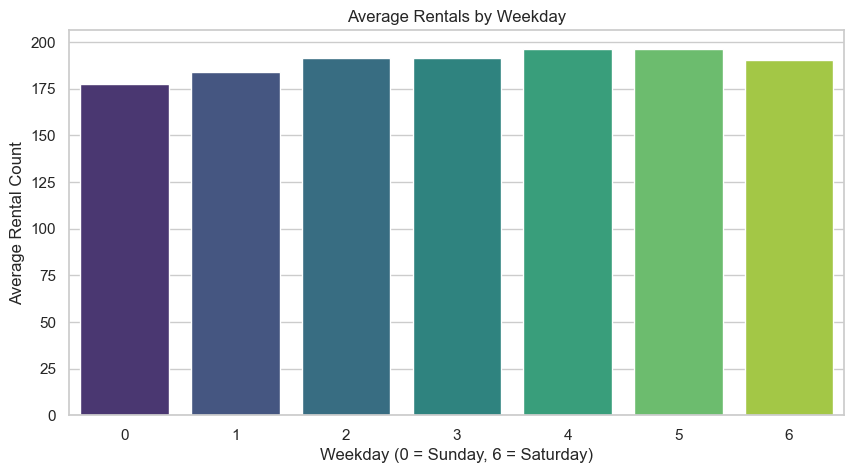

In [4]:
# 3. Average Rentals by Weekday
plt.figure(figsize=(10, 5))
weekday_avg = df.groupby("weekday")["cnt"].mean().reset_index()
sns.barplot(x="weekday", y="cnt", data=weekday_avg, palette="viridis")
plt.title("Average Rentals by Weekday")
plt.xlabel("Weekday (0 = Sunday, 6 = Saturday)")
plt.ylabel("Average Rental Count")
plt.show()

Helps spot trends across weekdays. We can see that the rentals stay pretty consistent during weekends as well as weekdays. There are more rentals on Thursdays-Fridays, but in general it stays pretty consistent. Although Sunday is the day with the least rentals, its not highly significant. We can assume then that they use bikes for commuting as well as for leisure.

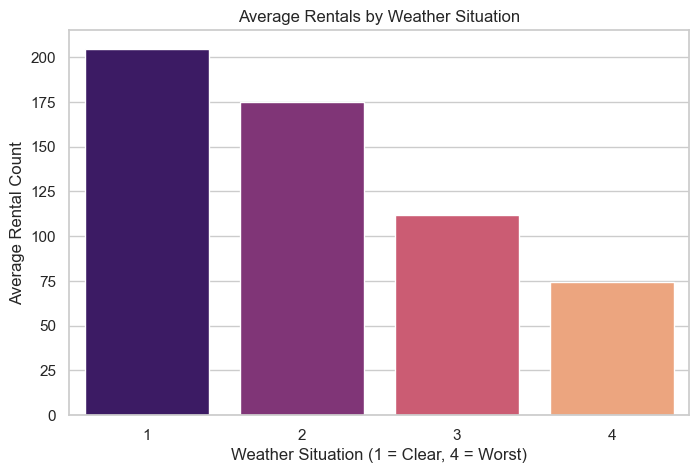

In [5]:
# 4. Rentals by Weather Situation
plt.figure(figsize=(8, 5))
weather_avg = df.groupby("weathersit")["cnt"].mean().reset_index()
sns.barplot(x="weathersit", y="cnt", data=weather_avg, palette="magma")
plt.title("Average Rentals by Weather Situation")
plt.xlabel("Weather Situation (1 = Clear, 4 = Worst)")
plt.ylabel("Average Rental Count")
plt.show()

Explores how external weather conditions affect bike usage. As we would expect in our data there is a negative correlation between poor weather and bike rental. The highest rental count occurs when the weathcer is clear and it drops as the weather also drops.

# Task 2: Data Splitting

In [9]:
from sklearn.model_selection import train_test_split

# Separate target and features
X = df.drop(columns=['cnt'])  # 'cnt' is the target variable
y = df['cnt']

# First split: 60% train, 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=13)

# Second split: 20% val, 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=13)

# Show the result
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (10427, 12)
Validation set shape: (3476, 12)
Test set shape: (3476, 12)


I split the data into 3 sets: 60% for training, 20% for validation, and 20% for testing. I did this by using train_test_split, ensuring that the model has enough data to learn from patters, enough separate data to tune parameters, and untouched data in order to evaluate performance.

We are doing this before of feature engineering in order to avoid data leakage. We don't want any over optimistic performance and poor generalization.


# Task 3: Feature Engineering